# DATA558 - Homework 2
Will Wright


## 1.2 Gradient descent  
The gradient descent algorithm is an iterative algorithm that is able to solve differentiable optimization problems such as (1). Define:


F(β)=n (yi−xTiβ)2 +λ∥β∥2. (3)  

Gradient descent generates a sequence of iterates1 (βt) that converges to the optimal solution
β⋆ of (1). The optimal solution of (1) is defined as:  

F(β⋆) = min F(β) . (4)
β∈Rd  

Gradient descent is outlined in Algorithm 1. The algorithm requires a sub-routine that computes the gradient for any β. The algorithm also takes as input the value of the constant step-size η.  

Assume that d=1 and n=1. The sample is the n of size 1 and boils down to just (x, y). The function F writes simply as

$$F(\beta) = (y-x\beta)^2 + \lambda\beta^2$$

Compute and write down the gradient ∇F of F .
  

**See attachment for written derivation**

Assume now that d > 1 and n > 1. Using the previous result and the linearity of differentiation, compute and write down the gradient ∇F(β) of F.

**See attachment for written derivation**

### Hitters Data Cleaning

Consider the Hitters dataset, which you should load and divide into training and test sets using the code below. Standardize the data. Note that you can convert a data frame into an array by using np.array().

In [233]:
# Load Packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import warnings
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import Ridge
warnings.filterwarnings("ignore") # suppress conversion warnings

# Load the data
hitters = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/Hitters.csv', sep=',', header=0)
hitters = hitters.dropna()

# Create our X matrix with the predictors and y vector with the response
X = hitters.drop('Salary', axis=1)
X = pd.get_dummies(X, drop_first=True)
y = hitters.Salary

# Divide the data into training and test sets. By default, 25% goes into the test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Convert to array
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

# Standardize data
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [234]:
# quick sanity check that the data is the right shape
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(197, 19)
(66, 19)
(197,)
(66,)


Write a function *computegrad* that computes and returns ∇F(β) for any β. Avoid using for loops by vectorizing the computation.

In [235]:
def computegrad(X, y, b, lam = 0.05):
    n = X.shape[0]
    res = y-X.dot(b) #calc residuals
    
    # calc F
    objective = np.sum(res.dot(res.T))+lam*np.sum(b.dot(b.T))
    # append new objective value (will start empty)
    objectives.append(objective) 
    
    # calc the gradient of F using the derived function with respect to Beta
    return (-(2/n)*X.T.dot(res)+2*lam*b)

Write a function graddescent that implements the gradient descent algorithm described in Algorithm 1. The function graddescent calls the function computegrad as a sub- routine. The function takes as input the initial point, the constant step-size value, and the maximum number of iterations. The stopping criterion is the maximum number of iterations.

In [236]:
def graddescent(b_init, eta, t, X, y):
    # initialize values
    iterations = 0
    weights = [b_init]
    X_biased = sm.add_constant(X) #add bias/intercept
    b = b_init
    
    while iterations < t:
        b =  b-eta*computegrad(X_biased, y, b)
        weights.append(b)
        iterations += 1
    return weights

Set the constant step-size to η = 0.05 and the maximum number of iterations to 1000. Run graddescent on the training set of the Hitters dataset for λ = 0.05.

In [241]:
# initialize vector to store grad(F) results
objectives = []

# run graddescent subroutine to get weights
coefs = graddescent(b_init = np.zeros([X_train.shape[1] + 1, 1]), #start at 0 coefs
                      eta = 0.05, 
                      t = 1000, 
                      X = X_train, 
                      y = y_train.reshape(len(y_train),1)) 

Plot the curve of the objective value F(βt) versus the iteration counter t. (Again, avoid using for loops when computing the objective values). What do you observe?

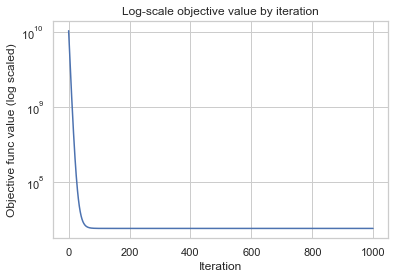

In [242]:
plt.plot(objectives)
plt.ylabel('F value (log scaled)')
plt.xlabel('Iteration')
plt.yscale('log')
plt.title('Log-scale objective value by iteration')
plt.show()

Denote βT the final iterate of your gradient descent algorithm. Compare βT to the β⋆ found by sklearn.linear model.Ridge. Compare the objective value for βT to the one for β⋆. What do you observe?

In [254]:
ridge = Ridge(alpha=0.05, solver = 'lsqr', fit_intercept=True)
ridge.fit(X_train, y_train)
ridge_coefs = np.insert(ridge.coef_.flatten(), 0, ridge.intercept_)

ridge_coefs = ridge_coefs.reshape((20, 1))
ridge_coefs

array([[ 520.51679695],
       [-265.42555751],
       [ 298.77231711],
       [  76.58939392],
       [ -85.27687696],
       [  -8.47353395],
       [ 145.14677794],
       [ -28.74334984],
       [-242.1992395 ],
       [ 262.40086241],
       [  -5.72474265],
       [ 362.20276914],
       [  -1.04516866],
       [-203.67814273],
       [  64.86124507],
       [  48.69944456],
       [ -35.8790475 ],
       [  20.55651724],
       [ -50.17302035],
       [  -7.02031566]])

In [246]:
final_coefs = np.array(coefs[1000]).reshape((20,1))
final_coefs

array([[495.73028281],
       [-95.46677459],
       [118.52001614],
       [ 30.85633735],
       [  5.03826593],
       [ 21.73138394],
       [ 80.13538576],
       [-35.07358692],
       [ 13.38166381],
       [126.11833   ],
       [-23.21879701],
       [120.11677501],
       [ 35.0359739 ],
       [-83.38717671],
       [ 54.62674475],
       [ 22.68432988],
       [-35.45194088],
       [ 16.90422096],
       [-52.25284016],
       [ -2.25974114]])

In [252]:
objectives[999]

23876246.11066596

* Run your gradient algorithm for many values of η on a logarithmic scale. Find the final iterate, across all runs for all the values of η, that achieves the smallest value of the objective. Compare βT to the β⋆ found by sklearn.linear model.Ridge. Compare the objective value for βT to the β⋆. What conclusion to you draw?

## Exercise 2
Exercise 3.8 in Chapter 3 of An Introduction to Statistical Learning (in Python): This question involves the use of simple linear regression on the Auto data set.

(a) Read in the dataset. The data can be downloaded from this url: http://www-bcf.usc.edu/~gareth/ISL/Auto.csv When reading in the data use the option na values=’?’. Then drop all NaN values using dropna().

In [113]:
auto = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Auto.csv', na_values = '?')

In [114]:
auto = auto.dropna()

(b) Use the OLS function from the statsmodels package to perform a simple linear regression with mpg as the response and weight as the predictor. Be sure to include an intercept. Use the summary() attribute to print the results. 

In [115]:
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

X = auto['weight']
X = sm.add_constant(X)
y = auto['mpg']

In [116]:
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     878.8
Date:                Fri, 19 Apr 2019   Prob (F-statistic):          6.02e-102
Time:                        14:34:47   Log-Likelihood:                -1130.0
No. Observations:                 392   AIC:                             2264.
Df Residuals:                     390   BIC:                             2272.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.2165      0.799     57.867      0.0

Comment on the output. For example:

(i) Is there a relationship between the predictor and the response?
(ii) How strong is the relationship between the predictor and the response?
(iii) Is the relationship between the predictor and the response positive or negative? Hint: See this URL for help with the statsmodels functions: http://www.statsmodels.org/dev/regression.html#examples

Yes, there is a relationship—a strong positive relationship with an R^2 of 0.692.  

(c) Plot the response and the predictor using the plot fit function (http://www.statsmodels.org/dev/generated/statsmodels.graphics.regressionplots.plot_fit.html)

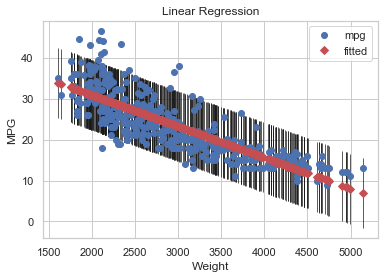

In [119]:
fig, ax = plt.subplots()
fig = sm.graphics.plot_fit(results, 1, ax=ax)
ax.set_ylabel("MPG")
ax.set_xlabel("Weight")
ax.set_title("Linear Regression")
plt.show()

(d) Plot the residuals vs. fitted values. Comment on any problems you see with the fit.

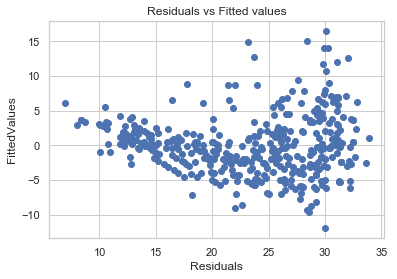

In [121]:
plt.scatter(results.fittedvalues, results.resid)
plt.xlabel('Residuals')
plt.ylabel('FittedValues')
plt.title('Residuals vs Fitted values')
plt.show()

There is strong heteroskedasticity, which violates a core assumption of linear models: that the residuals are homoskedastic.

## Exercise 3
Exercise 3.9 in Chapter 3 of An Introduction to Statistical Learning (in Python): This question involves the use of multiple linear regression on the Auto data set.

(a) Produce a scatterplot matrix which includes all of the variables in the data set using pandas.plotting.scatter matrix.

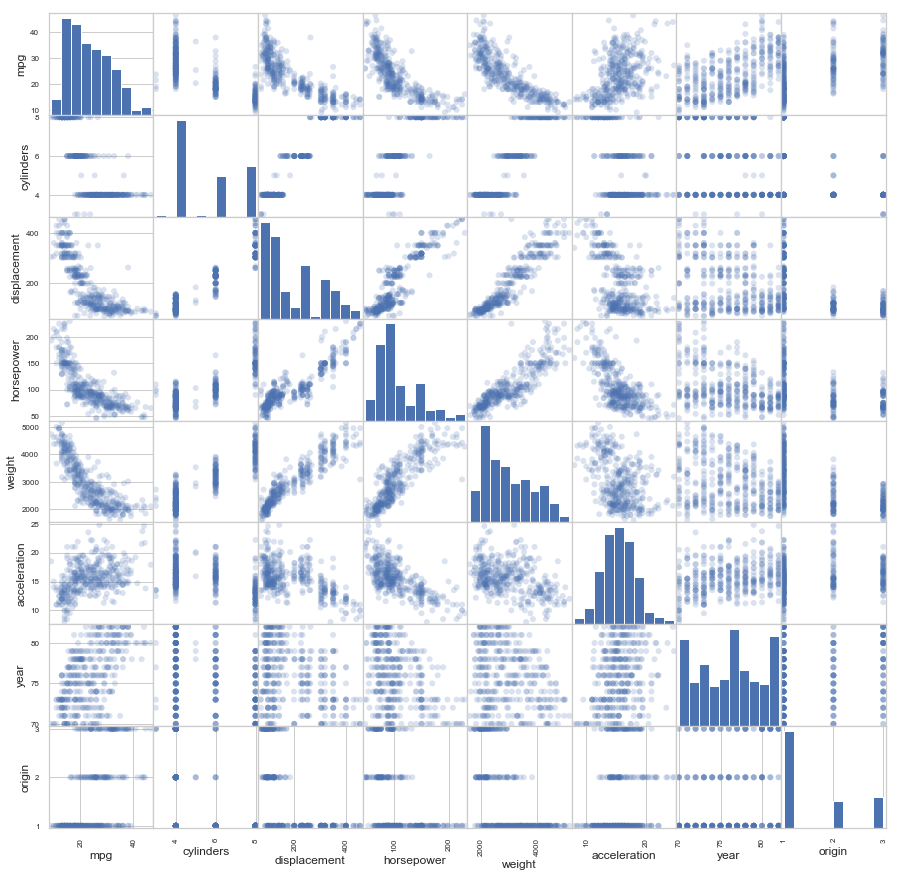

In [129]:
plot = pd.plotting.scatter_matrix(auto, figsize = (15,15), marker='o', alpha=.2)  

(b) Compute the matrix of correlations between the variables using the corr() attribute in Pandas.

In [130]:
auto.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


(c)
Use the OLS function from the statsmodels package to perform a multiple linear regression with mpg as the response and all other variables except name as the predictors. Be sure to include an intercept. Print the results. Comment on the output. For instance:

In [131]:
y = auto['mpg']
X = auto.loc[:, ~auto.columns.isin(['mpg', 'name'])]
X = sm.add_constant(X)
model_allVars = sm.OLS(y, X)

In [132]:
results = model_allVars.fit()

In [133]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Fri, 19 Apr 2019   Prob (F-statistic):          2.04e-139
Time:                        14:51:49   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.2184      4.644     -3.707   

(i) Is there a relationship between the predictors and the response?

(ii) Which predictors appear to have a statistically significant relationship to the response?

(iii) What does the coefficient for the year variable suggest?
Plot the residuals vs. fitted values. Comment on any problems you see with the fit.
Statsmodels allows you to fit models using R-style formulas. See http://www.statsmodels. org/dev/example_formulas.html. Use the * and : symbols to fit linear regression models with interaction effects. Do any interactions appear to be statistically significant?
Try a few different transformations of the variables, such as log(X), √X, X2 . Com- ment on your findings.

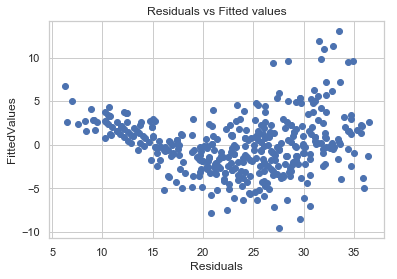

In [134]:
plt.scatter(results.fittedvalues, results.resid)
plt.xlabel('Residuals')
plt.ylabel('FittedValues')
plt.title('Residuals vs Fitted values')
plt.show()

## Exercise 4
 
 Exercise 3.12 in Chapter 3 of An Introduction to Statistical Learning (in Python): This problem involves simple linear regression without an intercept.

(a) Recall that the coefficient estimate β for the linear regression of Y onto X without an intercept is given by (3.38). Under what circumstance is the coefficient estimate for the regression of X onto Y the same as the coefficient estimate for the regression of Y onto X?

(b) Generate an example in Python with n = 50 observations in which the coefficient estimate for the regression of X onto Y is different from the coefficient estimate for the regression of Y onto X.

(c) Generate an example in Python with n = 50 observations in which the coefficient estimate for the regression of X onto Y is the same as the coefficient estimate for the regression of Y onto X.